# Graphing Stock Data From Yahoo Finance

## Part 1: This section downloads data from Yahoo Finance and graphs the  daily returns

In [16]:
#This section of code imports the needed packages to complete the project
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pandas import datetime
from pandas_datareader import data
from pandas.plotting import register_matplotlib_converters

In [17]:
#This section imports the Starbucks, Netflix and S&P 500 daily price from Yahoo Finance for the year of 2018
tickers = ["SBUX", "NFLX", "^GSPC"]
start_date = "2018-01-01"
end_date = "2018-12-31"
chart1 = data.DataReader(tickers, data_source = 'yahoo', start = start_date, end = end_date)


In [18]:
#View head of the imported data
chart1.head()

Attributes        High             ...  Adj Close             
Symbols           NFLX       SBUX  ...       SBUX        ^GSPC
Date                               ...                        
2018-01-02  201.649994  58.209999  ...  55.286171  2695.810059
2018-01-03  206.210007  58.959999  ...  56.322239  2713.060059
2018-01-04  207.050003  59.410000  ...  56.533295  2723.989990
2018-01-05  210.020004  59.689999  ...  57.185638  2743.149902
2018-01-08  212.500000  59.669998  ...  56.897835  2747.709961

[5 rows x 18 columns]

In [19]:
#view information about imported dataframe
chart1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 18 columns):
(High, NFLX)          251 non-null float64
(High, SBUX)          251 non-null float64
(High, ^GSPC)         251 non-null float64
(Low, NFLX)           251 non-null float64
(Low, SBUX)           251 non-null float64
(Low, ^GSPC)          251 non-null float64
(Open, NFLX)          251 non-null float64
(Open, SBUX)          251 non-null float64
(Open, ^GSPC)         251 non-null float64
(Close, NFLX)         251 non-null float64
(Close, SBUX)         251 non-null float64
(Close, ^GSPC)        251 non-null float64
(Volume, NFLX)        251 non-null float64
(Volume, SBUX)        251 non-null float64
(Volume, ^GSPC)       251 non-null float64
(Adj Close, NFLX)     251 non-null float64
(Adj Close, SBUX)     251 non-null float64
(Adj Close, ^GSPC)    251 non-null float64
dtypes: float64(18)
memory usage: 37.3 KB


In [20]:
# Only keep adjusted closing prices from chart1, find the daily returns and view the head of the resulting dataframe 
adj_close = chart1['Adj Close']
returns = adj_close.pct_change().dropna()
returns.head()

Symbols,NFLX,SBUX,^GSPC
Date,,,
2018-01-03,0.019794,0.018740,0.006399
2018-01-04,0.002829,0.003747,0.004029
2018-01-05,0.021203,0.011539,0.007034
2018-01-08,0.009810,-0.005033,0.001662
2018-01-09,-0.012922,-0.002192,0.001303


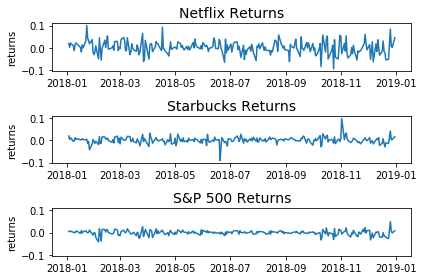

In [24]:
# View subplots of Netflix returns, Starbucks returns and S&P 500 returns
%matplotlib inline
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharey = True)
ax1.plot(returns['NFLX'])
ax1.set_title("Netflix Returns", fontsize = 14)
ax1.set_ylabel('returns')
ax2.plot(returns['SBUX'])
ax2.set_title("Starbucks Returns", fontsize = 14)
ax2.set_ylabel('returns')
ax3.plot(returns['^GSPC'])
ax3.set_title("S&P 500 Returns", fontsize = 14)
ax3.set_ylabel('returns')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

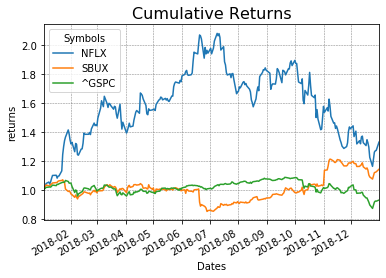

In [32]:
# View cumulative daily returns on the same plot
fig = plt.figure()
(returns + 1).cumprod().plot()
plt.grid(color='grey', linestyle='--', linewidth=.5)
plt.title('Cumulative Returns', fontsize = 16)
plt.xlabel('Dates')
plt.ylabel('returns')
plt.show()

## Part 2: This section selects only the adjusted closing prices from the beginning of the month and the end of the month and graphs the monthly returns

In [26]:
# created a 'Dates' column out of the index
adj_close['Dates'] = adj_close.index
# ascertain the 'Dates' column was created
adj_close.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 4 columns):
NFLX     251 non-null float64
SBUX     251 non-null float64
^GSPC    251 non-null float64
Dates    251 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.8 KB


__main__:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
#Group the data by month
adj_close_bmonth = adj_close.groupby(pd.Grouper( freq='M'))

#Extract only the minimum and maximum values from the adj_close_bmonth dataframe
last_days = adj_close_bmonth.max()
first_days = adj_close_bmonth.min()

#Reset the indexes of first_days and last_days to the Dates column
first_days = first_days.set_index('Dates')
last_days= last_days.set_index('Dates')

#Concatenate firs_days and last_days dataframes
frames = [first_days,last_days]
result = pd.concat(frames)

#Sort the new index by ascending date
result = result.sort_index()

#Create monthly returns from last days of the month and first days of the month
monthly_returns_bg = first_days.pct_change().dropna()
monthly_returns_end = first_days.pct_change().dropna()

#View the 'result' dataframe
print(result)


Symbols           NFLX       SBUX        ^GSPC
Dates                                         
2018-01-02  201.070007  54.499512  2695.810059
2018-01-31  284.589996  59.181042  2872.870117
2018-02-01  249.470001  51.862938  2581.000000
2018-02-28  294.160004  55.142345  2821.979980
2018-03-01  285.769989  54.177811  2588.260010
2018-03-29  331.440002  57.293255  2786.570068
2018-04-02  280.290009  54.245335  2581.879883
2018-04-30  336.059998  57.708012  2708.639893
2018-05-01  311.690002  54.139236  2629.729980
2018-05-31  353.540009  56.157879  2733.290039
2018-06-01  359.929993  47.063255  2699.629883
2018-06-29  416.760010  55.682785  2786.850098
2018-07-02  334.959991  47.131126  2713.219971
2018-07-31  418.970001  50.796124  2846.070068
2018-08-01  316.779999  50.107723  2813.360107
2018-08-31  370.980011  52.721645  2914.040039
2018-09-04  341.179993  52.262768  2871.679932
2018-09-28  380.709991  56.089973  2930.750000
2018-10-01  284.839996  53.561291  2641.250000
2018-10-31  3

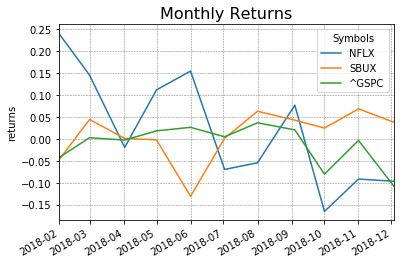

In [34]:
#View monthly returns calculated using percentage change of adjusted end of month prices
monthly_returns_end.plot()
plt.ylabel('returns')
plt.xlabel("")
plt.title('Monthly Returns', fontsize = 16)
plt.grid(color='grey', linestyle='--', linewidth=.5)
plt.show()